## Unified Mentor Data Analyst Internship.


## Name : Ashutosh Kumar


### Project 1 : Amazon Sales Data Analysis




#### problem statement:


Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.
Do ETL: Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month-wise, year-wise, yearly_month-wise
Find key metrics and factors and show the meaningful relationships between
attributes. Do your own research and come up with your findings.

#### Dataset : Amazon Sales Dataset

In [1]:
pip install pandas numpy matplotlib seaborn plotly scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 58.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
## Importing the necessary Libraries 
## For Data manipulation and analysis 
import pandas as pd 
import numpy as np 

## For Data visualizations  
import matplotlib.pyplot as plt 
import seaborn as sns 

## For Date and time manipulation 
import datetime 

## For interactive visualizations 
import plotly.express as px 
import plotly.graph_objects as go 

## For advanced data manipulations 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

In [ ]:
## Load The Dataset
data = pd.read_csv('Amazon Sales data.csv')

In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
## Data Cleaning 
missing_values = data.isnull().sum()
print("Missing vlaues :\n" , missing_values)

Missing vlaues :
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


There is no missing values or null values in the data , this means our data is already cleaned.

In [6]:
## Convert Order Date to Datetime 
data["Order Date"]= pd.to_datetime(data["Order Date"])

In [7]:
## Extract Year and Month from Order Date 
data["Year"] = data["Order Date"].dt.year
data["Month"] = data["Order Date"].dt.month
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


### Data Analysis

In [8]:
## Calculate the number of regions 
regions = data['Region'].nunique()
print("Number of Regions :" , regions)

Number of Regions : 7


#### There are 7 differnt Regions in our Dataset

In [9]:
## Calculate the number of countries 
country  = data["Country"].nunique()
print("Number of Countries:" , country)

Number of Countries: 76


#### There are 76 different countries in our datasets

In [10]:
## Calculate the item Types
item_type  = data["Item Type"].nunique()
print("Number of items Types :", item_type)

Number of items Types : 12


#### There are 12 different item types in our Dataset

In [11]:
## Calculate the Total Unit Sold
unit_sold = data["Units Sold"].sum()
print("Total Unit Sold:" , unit_sold)

Total Unit Sold: 512871


In [12]:
##  Calculate the Total Unit cost.
unit_cost = data['Unit Cost'].sum()
print("Total unit cost:" , unit_cost)


Total unit cost: 19104.8


In [13]:
## Calculate the Total Revenue 
total_revenue = data['Total Revenue'].sum()
print("Total Revenue :" , total_revenue )

Total Revenue : 137348768.31


In [14]:
## Calculate the total Cost 
total_cost = data["Total Cost"].sum()
print("Total Cost:" , total_cost)

Total Cost: 93180569.91000001


In [15]:
## Calculate the total profit 
total_profit = data['Total Profit'].sum()
print("Total Profit :", total_profit)

Total Profit : 44168198.39999999


In [16]:
data.groupby(['Region' ,'Sales Channel'])['Total Profit'].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

Text(0, 0.5, 'Total Revenue')

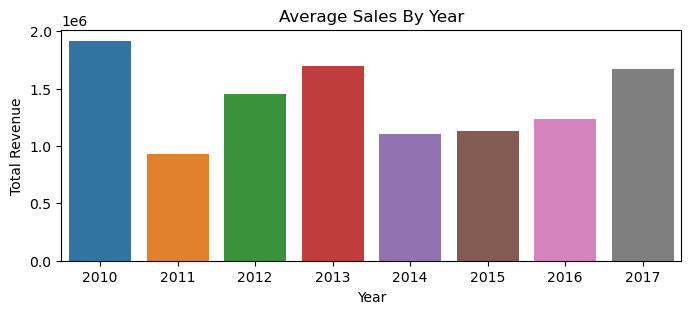

In [17]:
## Year wise Sales 
year_sales = data.groupby ('Year')['Total Revenue'].mean()
plt.figure(figsize =(8,3))
sns.barplot(x= year_sales.index , y = year_sales.values,)
plt.title('Average Sales By Year')
plt.xlabel ("Year")
plt.ylabel ("Total Revenue")

Text(0.5, 1.0, 'Average Profit in Region wise ')

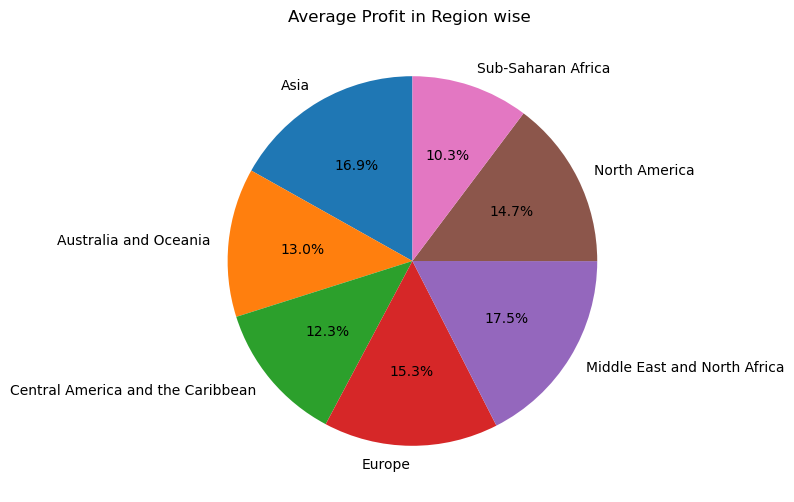

In [18]:
## Pie Cahrt of tool profit in region wise 
plt.figure(figsize=(6,6))
region_TotalRevenue = data.groupby('Region')['Total Profit'].mean()
plt.pie(region_TotalRevenue,startangle= 90 , labels = region_TotalRevenue.index ,autopct = '%1.1f%%')
plt.title('Average Profit in Region wise ')

In [19]:
## Group Total Revenue by item type 
TotalRevenue_ItemType = data.groupby('Item Type')['Total Revenue'].sum()


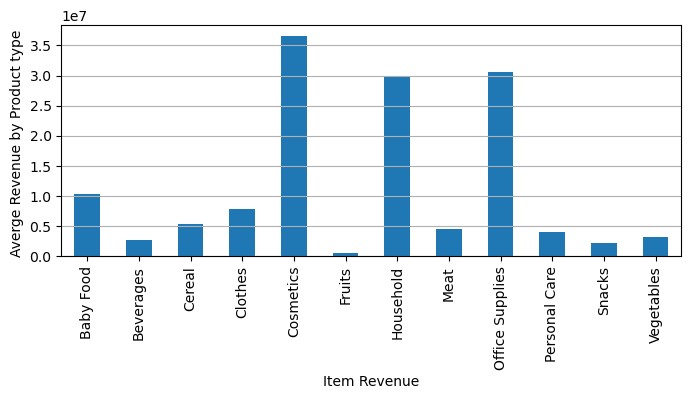

In [20]:
## BAR chart for the total Revenue item type
plt.figure (figsize =(8,3))
TotalRevenue_ItemType.plot(kind ='bar')
plt.xlabel('Item Revenue')
plt.ylabel ('Averge Revenue by Product type ')
plt.grid(axis = 'y')

In [21]:
## Group Total Revenue by sales  Channel 
TotalRevenue_SalesChannel = data.groupby('Sales Channel')['Total Revenue'].mean()

Text(0.5, 1.0, 'Total Revenue by sales Channel')

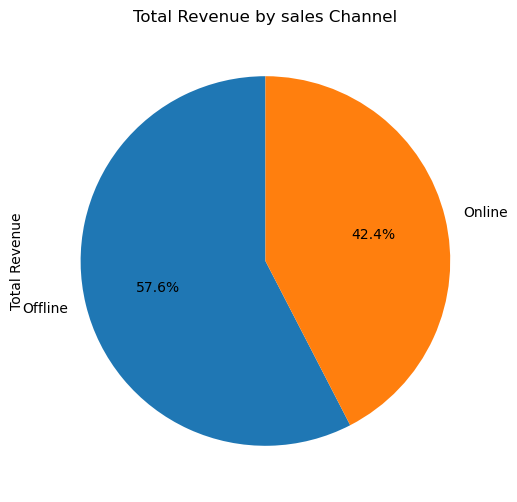

In [22]:
## Bar chart total Revenue by item type 
plt.figure(figsize =(6,6))
plt.tight_layout()
TotalRevenue_SalesChannel.plot(kind = 'pie' , autopct ='%1.1f%%',startangle=90)
plt.title("Total Revenue by sales Channel")

(-1.0999999643523064, 1.0999992700437213, -1.1, 1.1)

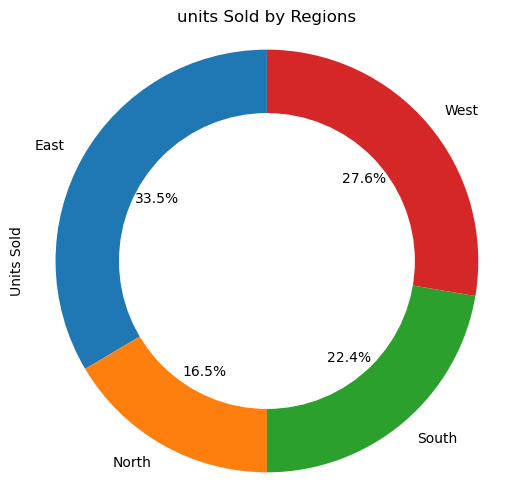

In [29]:
## Create a Pie Chart for a donut chart 
Region_UnitSold = data.groupby('Region')['Units Sold'].sum()
plt.figure(figsize=(6, 6))
Region_UnitSold.plot(kind= 'pie' , labels = Region_UnitSold.index , autopct = '%1.1f%%', startangle = 90)

## Draw a circle at the centre of the pie chart 
cntr_circle = plt.Circle ((0,0),(0.70),fc ='white')
fig= plt.gcf()
fig.gca().add_artist(cntr_circle)

## Equal aspects ratio ensures that pie is drawn as a circle 
plt.title('units Sold by Regions')
plt.axis('equal')

In [37]:
import pandas as pd

# Read data from CSV
data = pd.read_csv('Amazon Sales data.csv')

# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract 'Year' and 'Month' from 'Order Date'
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

# Grouping the data by Year and Month and summing the Units Sold
YearMonth_UnitsSold = data.groupby(['Year', 'Month'])['Units Sold'].sum()

# Display the grouped data
print(YearMonth_UnitsSold)


Year  Month
2010  2         9503
      5        15747
      6         9905
      10       14403
      11        7910
      12        4103
2011  1        12914
      2         8156
      4         4187
      5         5741
      6          124
      7          888
      9         3732
      11       19026
2012  1         1548
      2        15776
      3         6457
      4         8903
      5        10984
      6         7620
      7        22646
      8         2804
      9        16545
      10        4684
2013  2         5062
      3         4063
      4         5010
      6         5432
      7        19546
      8         9606
      9         7637
      10        6182
      12        2125
2014  2        10460
      4        13808
      5         9229
      6         8102
      7        14513
      8         4168
      9         2187
      10       22619
      11        6954
2015  1         8250
      2         5821
      4        12772
      7        13110
      8          673
 

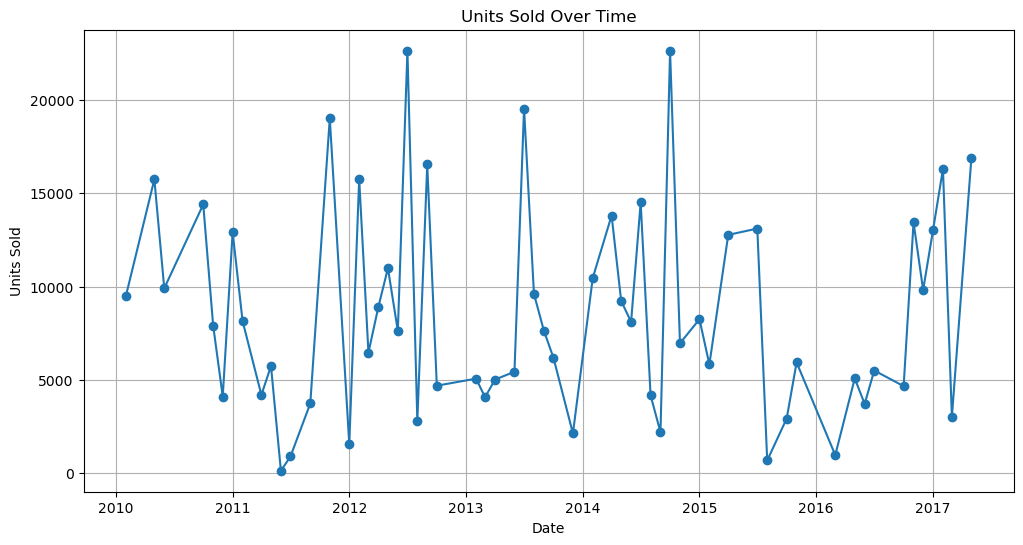

In [38]:
import matplotlib.pyplot as plt
# Assuming 'YearMonth_UnitsSold' contains the grouped data you've shown
# Reset the index to convert the grouped data into a DataFrame
YearMonth_UnitsSold = YearMonth_UnitsSold.reset_index()
# Convert Year and Month to a single datetime column
YearMonth_UnitsSold['Date'] = pd.to_datetime(YearMonth_UnitsSold[['Year', 'Month']].assign(day=1))
# Sort by date for plotting
YearMonth_UnitsSold = YearMonth_UnitsSold.sort_values('Date')
# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(YearMonth_UnitsSold['Date'], YearMonth_UnitsSold['Units Sold'], marker='o')
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()


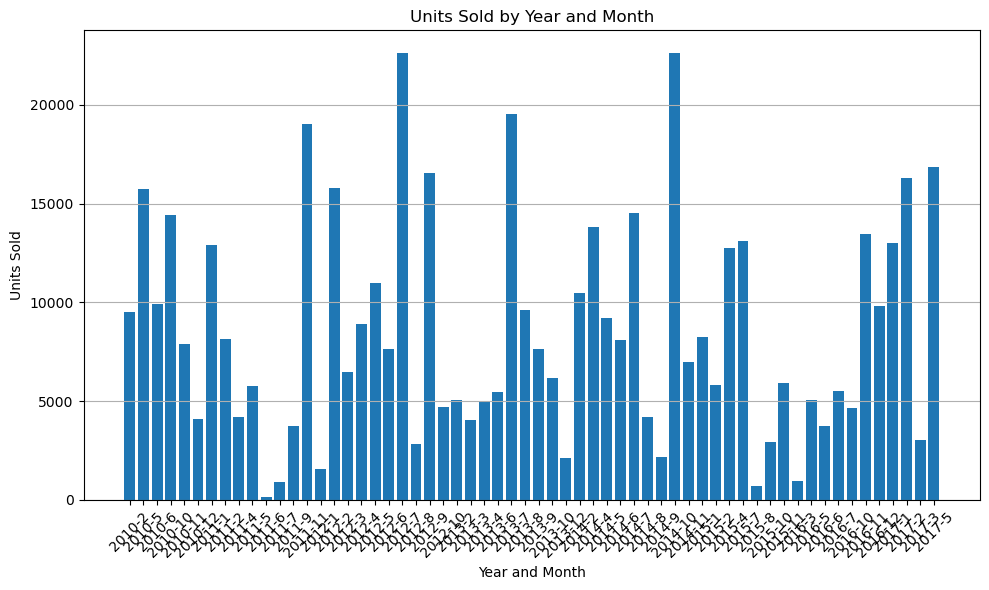

In [41]:
import matplotlib.pyplot as plt

# Assuming 'YearMonth_UnitsSold' contains the grouped data you've shown

# Reset the index to convert the grouped data into a DataFrame
YearMonth_UnitsSold = YearMonth_UnitsSold.reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(YearMonth_UnitsSold['Year'].astype(str) + '-' + YearMonth_UnitsSold['Month'].astype(str), YearMonth_UnitsSold['Units Sold'])
plt.xlabel('Year and Month')
plt.ylabel('Units Sold')
plt.title('Units Sold by Year and Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
## Group by Total sales Channel 
TotalCost_SalesChannel = data.groupby('Sales Channel')['Total Cost'].sum()


In [ ]:
TotalCost_SalesChannel = data.groupby('Sales Channel')['Total Cost'].sum()
### Bar chart for total cost by sales channel 
plt.figure(figsize = (6,6))
TotalCost_SalesChannel.plot(kind = 'pie', autopct ='1.1f%%',startangle = 90)
plt.title('Total Cost by Sales Cha')